IP3_ALB

Author: Aaron Bone 
Version: 1.0 2/15/2021

In [249]:
#imports

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import statsmodels.api as sm
%matplotlib inline


1. You have been given four .csv files. Each file represents a different German power company’s wind turbine
power generation data. Your first goal is to merge these datasets together. To do this, write a function that
takes a filename (of and returns a dataframe. Your function should do the following:

    a. Convert the Date column to a date (notice, the data are in d/m/y format – take that into consider
    when you convert.
    
    b. Since none of the files have a column for company, you need to add one called Company that
    contains the Company name (you can extract this from .csv filename. Hint: dataframes have an
    insert function

In [250]:
#fh = pd.read_csv("50Hertz.csv")
#amp = pd.read_csv("Amprion.csv")
#ttso = pd.read_csv("TenneTTSO.csv")
#tbw = pd.read_csv("TransnetBW.csv")

def dataprepper(s):
    df = pd.read_csv(s)
    s=s.split('.')
    df.insert(0,"Company", s[0], allow_duplicates=False)
    df.Date = pd.to_datetime(df.Date, dayfirst=True)
    return df

2. Execute your function four times, passing each file to it. Once complete, you will have four dataframes that
you can merge.

In [251]:
fh = dataprepper("50Hertz.csv")
amp = dataprepper("Amprion.csv")
ttso = dataprepper("TenneTTSO.csv")
tbw = dataprepper("TransnetBW.csv")

To check datamerger correctly changes the date datatype in regard to d/m/y.

In [252]:
fh.dtypes

Company             object
Date        datetime64[ns]
00:00:00             int64
00:15:00             int64
00:30:00             int64
                 ...      
22:45:00             int64
23:00:00             int64
23:15:00             int64
23:30:00             int64
23:45:00             int64
Length: 98, dtype: object

Check to see if "Company" Column was added correctly.

In [253]:
fh.dtypes

Company             object
Date        datetime64[ns]
00:00:00             int64
00:15:00             int64
00:30:00             int64
                 ...      
22:45:00             int64
23:00:00             int64
23:15:00             int64
23:30:00             int64
23:45:00             int64
Length: 98, dtype: object

In [254]:
fh.sample()

,Company,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
195,50Hertz,2020-03-05,89,85,83,78,70,70,68,67,...,266,268,266,263,261,253,246,234,234,227


3. Stack the dataframes on top of each to produce one large dataframe that has 98 columns, one for company,
one for date and one for each timepoint.

In [255]:
df = pd.concat([fh,amp,ttso,tbw])

In [256]:
df

,Company,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,50Hertz,2019-08-23,74.00,73.00,63.00,55.00,54.00,53.00,51.00,52.00,...,68.00,68.00,63.00,61.00,57.00,52.00,51.00,49.00,45.00,40.00
1,50Hertz,2019-08-24,37.00,38.00,35.00,35.00,31.00,32.00,30.00,29.00,...,118.00,118.00,112.00,107.00,104.00,104.00,99.00,95.00,95.00,96.00
2,50Hertz,2019-08-25,93.00,88.00,85.00,81.00,76.00,80.00,81.00,76.00,...,111.00,108.00,103.00,96.00,93.00,88.00,86.00,82.00,80.00,77.00
3,50Hertz,2019-08-26,72.00,66.00,59.00,54.00,48.00,46.00,45.00,43.00,...,48.00,47.00,47.00,46.00,47.00,49.00,50.00,51.00,48.00,42.00
4,50Hertz,2019-08-27,39.00,38.00,36.00,36.00,34.00,31.00,31.00,30.00,...,54.00,53.00,51.00,52.00,51.00,52.00,54.00,54.00,56.00,59.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,TransnetBW,2020-09-18,43.00,44.43,44.33,46.67,46.67,46.67,47.44,45.50,...,41.56,38.44,38.44,36.75,37.57,41.11,40.00,39.86,39.89,37.50
393,TransnetBW,2020-09-19,37.43,35.22,36.60,33.44,32.67,36.00,34.00,30.89,...,6.67,7.56,6.78,7.56,7.56,7.33,6.56,6.56,5.78,5.00
394,TransnetBW,2020-09-20,5.00,5.00,5.00,5.00,4.22,4.22,4.00,4.78,...,7.00,6.00,6.67,8.33,6.78,5.22,4.44,2.67,2.67,2.67
395,TransnetBW,2020-09-21,3.44,3.44,3.44,3.44,2.67,3.44,1.67,2.44,...,5.71,6.56,5.60,4.71,4.00,3.29,2.33,2.25,2.22,1.33


4. You are going to visualize aggregate data first. To start, you need to create a new dataframe that is grouped
by Company and the year (e.g. 50Hertz 2019, 50Hertz 2020, etc.). You can group by multiple columns by
putting the column list in []. Group by the mean() function.

In [257]:
columnlist = df.columns.tolist()
df['year'] = pd.DatetimeIndex(df['Date']).year
master_df = df[columnlist].groupby([df["Company"],df["year"]]).mean()

In [258]:
master_df.dtypes

00:00:00    float64
00:15:00    float64
00:30:00    float64
00:45:00    float64
01:00:00    float64
             ...   
22:45:00    float64
23:00:00    float64
23:15:00    float64
23:30:00    float64
23:45:00    float64
Length: 96, dtype: object

5. The first plot you want to make is horizontal bar chart that shows the average amount of power generated
by each company, in each year for midnight and another bar graph that shows the same for noon. 

To this:
   
   a. Write the code to extract a dataframe for each time point (00:00:00 and 12:00:00) and put them in
      their own objects name midnight and noon.
   
   b. Write the code to create a horizontal bar chart for each dataset that look the those below. Note:
      These are two separate charts, they are not subplots.
   
   c. Save each chart separately.

In [259]:
midnight = master_df.get("00:00:00")
noon = master_df.get("12:00:00")
midnight

Company     year
50Hertz     2019    143.320611
            2020    141.894737
Amprion     2019    106.992366
            2020     93.751880
TenneTTSO   2019    150.866183
            2020    141.603835
TransnetBW  2019     39.293740
            2020     30.899023
Name: 00:00:00, dtype: float64

In [260]:
noon

Company     year
50Hertz     2019    142.473282
            2020    163.398496
Amprion     2019    100.572519
            2020    101.357143
TenneTTSO   2019    149.229466
            2020    162.944436
TransnetBW  2019     37.772366
            2020     25.731053
Name: 12:00:00, dtype: float64

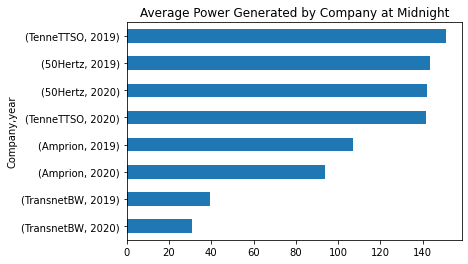

In [261]:
plt.title('Average Power Generated by Company at Midnight')
midnight_plot = midnight.sort_values().plot(kind = 'barh')
plt.savefig('midnight.png')

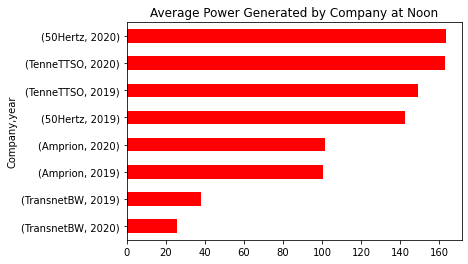

In [262]:
plt.title('Average Power Generated by Company at Noon')
noon_plot = noon.sort_values().plot(kind = 'barh', color='red')
plt.savefig('noon.png')

6. You have been asked to combine the two bar graphs into a single graph that shares the x-axis. And, it will
be published in newspaper in grayscale, so the top graph should be silver and the bottom should be gray.
Save the file as ‘combined_bar_chart.png’. The chart should appear as below:

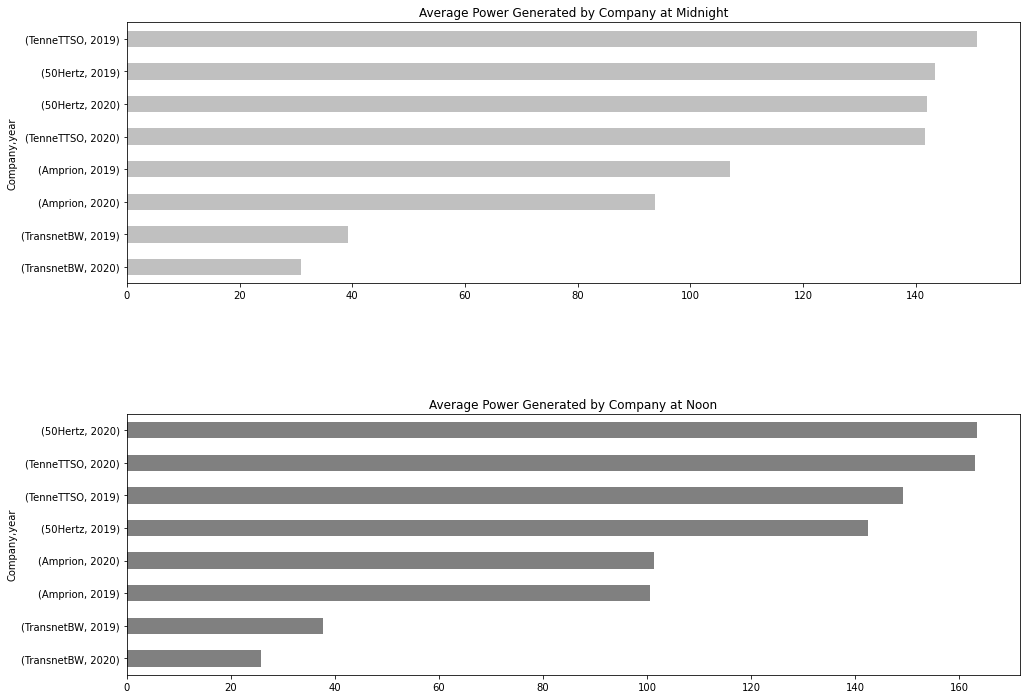

In [263]:
fig = plt.figure(figsize=(16,12))
fig.subplots_adjust(hspace = .5)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

midnight.sort_values().plot(kind = 'barh',title = 'Average Power Generated by Company at Midnight', ax = ax1, color = 'silver')
noon.sort_values().plot(kind = 'barh',title = 'Average Power Generated by Company at Noon', ax = ax2, color = 'grey')

fig.savefig('combined_bar_chart.png')

7. You have been asked to write a function that accepts the ungrouped dataframe, the company name, date,
and a plotting color that generates an area graph for that particular company/day. Use this function
signature: daily_view(dataframe, company, date, color). Your function should produce
the following graph:

In [264]:
def daily_view(dataframe, company, date, color):
    subset = dataframe.query("Company == '"+ company+"' and Date == '"+ date+"'")
    subset.drop(['Company','Date','year'],axis=1,inplace=True)
    values = subset.iloc[0]
    values.plot.area(title='Power Production: '+company+'/'+date,
                     ylabel='TW/h Generated',
                     xlabel='Time of Day',
                     color=color,
                     figsize=(16,12))

In [265]:
daily_view(master_df, '50Hertz', '2019-08-24', 'purple')

UndefinedVariableError: name 'Date' is not defined

Bonus:


Part 2:
In class we looked at several data sets provided by Seaborn including fmri, flights, and mpg. Using one or more of
the other data sets besides (fmri, flights, mpg and penguin) generate examples of the following plots:
1. Line Chart
2. Box/Whisker
3. Histograms and Kernel Density
4. Heatmap
5. Seaborn Pair Plot


In [266]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [267]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Line Chart

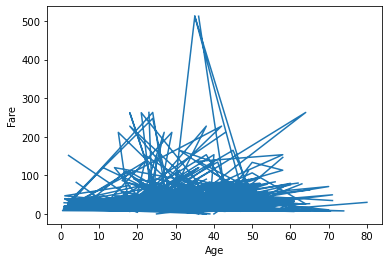

In [268]:
x = titanic.age
y = titanic.fare

plt.plot(x, y)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

Box Plot

In [269]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


{'whiskers': [<matplotlib.lines.Line2D at 0x27449fae130>,
 'caps': [<matplotlib.lines.Line2D at 0x27449fae7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27449f9ed90>],
 'medians': [<matplotlib.lines.Line2D at 0x27449faeeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27449fb9250>],
 'means': []}

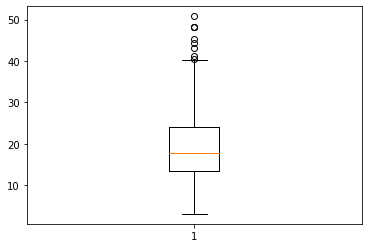

In [270]:
plt.boxplot(tips.total_bill)

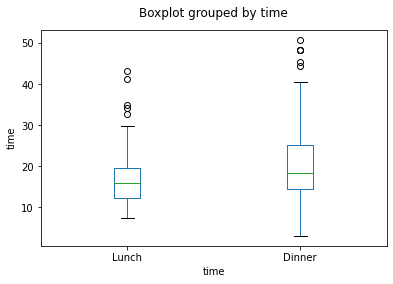

In [271]:
bxt = tips.boxplot(column = 'total_bill', by = 'time')
bxt.set_title('')
bxt.set_ylabel('time')
bxt.grid(False)

Histogram

In [272]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


(array([549.,   0.,   0., 342.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <BarContainer object of 4 artists>)

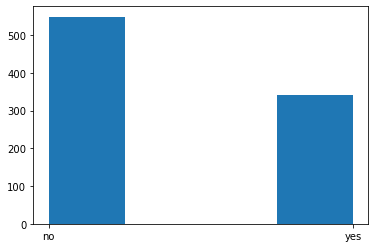

In [273]:
plt.hist(titanic.alive, bins = 4)

Kernal Density

In [274]:
diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


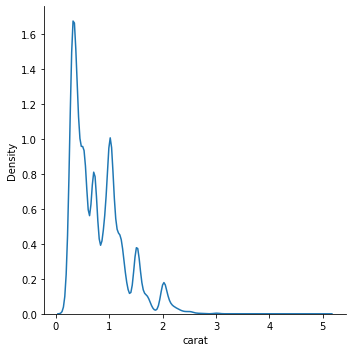

In [275]:
sns.displot(diamonds.carat, kind = 'kde')

Heatmaps

In [276]:
dots = sns.load_dataset('dots')
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


In [277]:
anagrams = sns.load_dataset('anagrams')
anagrams

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


<AxesSubplot:xlabel='attnr', ylabel='subidr'>

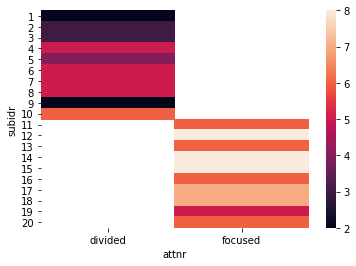

In [278]:
anagrams = anagrams.pivot("subidr","attnr","num1")
sns.heatmap(anagrams)

Pairplot

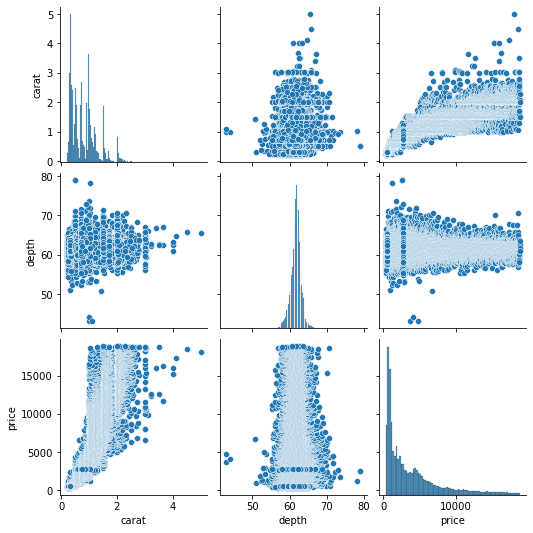

In [279]:
sns.pairplot(diamonds[['carat', 'color', 'depth', 'price' ]])